In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [1]:

import tensorflow as tf
import os

In [2]:
import keras

In [7]:

pydot.__file__

'/Users/zy/Downloads/ENTER/lib/python3.7/site-packages/pydot.py'

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model

# 这部分返回一个张量
inputs = Input(shape=(784,))

# 层的实例是可调用的，它以张量为参数，并且返回一个张量
x = Dense(64, activation='relu')(inputs)
predictions = Dense(10, activation='softmax')(x)

# 这部分创建了一个包含输入层和三个全连接层的模型
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


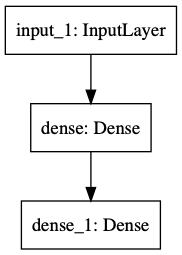

In [4]:
plot_model(model, to_file='model.png')

In [5]:
tf.__version__

'2.2.0'

In [6]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [7]:
datasets, info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = datasets['train'], datasets['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dataset mnist downloaded and prepared to /Users/zy/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [9]:
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


tensorflow.python.distribute.mirrored_strategy.MirroredStrategy

In [ ]:
# =============================================

In [10]:
BUFFER_SIZE = 10000
BATCH_SIZE_PER_REPLICA = 64
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

In [12]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255

    return image, label

In [13]:
train_dataset = mnist_train.map(scale).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
eval_dataset = mnist_test.map(scale).batch(BATCH_SIZE)

In [20]:
mnist_train.__dict__.keys()

dict_keys(['_input_dataset', '_buffer_size', '_variant_tensor_attr', '_self_setattr_tracking', '_self_unconditional_checkpoint_dependencies', '_self_unconditional_dependency_names', '_self_unconditional_deferred_dependencies', '_self_update_uid', '_self_name_based_restores', '_variant_tracker', '_graph_attr'])

In [23]:
mnist_train.map(scale)

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>